<a href="https://colab.research.google.com/github/vanderbilt-ml/51-assign05-BRay/blob/main/Assignment05_bray_hof_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basketball Hall of Fame

Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.ensemble import GradientBoostingClassifier, RandomTreesEmbedding #Gradient Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [62]:
path="/content/drive/MyDrive/csv/seasons_stats.csv";
hof_df=pd.read_csv(path)
# dropping some columns for performance
hof_df=hof_df.drop(['Player' ,'ORB%', 'DRB%', 'TRB%', 'OWS', 'OWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'ORB%', 'DRB%', 'TRB%','AST%', 'STL%', 'MP', 'PER', 'TS%', '3PAr', 'TOV%', 'USG%', 'Age', 'PF'], axis=1)
display(hof_df.head())
hof_df.info()

,Year,HOF,Pos,Tm,G,GS,FTr,BLK%,DWS,FG,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
0,1986.0,No,PF,LAL,82.0,1.0,0.430,1.7,2.0,209.0,...,167.0,0.611,160.0,221.0,381.0,54.0,49.0,49.0,99.0,521.0
1,1987.0,No,PF,LAL,79.0,72.0,0.480,2.0,3.3,316.0,...,282.0,0.780,210.0,405.0,615.0,84.0,70.0,80.0,102.0,852.0
2,1988.0,No,PF,LAL,82.0,64.0,0.592,1.0,3.4,322.0,...,379.0,0.773,245.0,465.0,710.0,93.0,87.0,45.0,120.0,937.0
3,1989.0,No,PF,LAL,82.0,82.0,0.474,1.2,3.5,401.0,...,359.0,0.786,258.0,481.0,739.0,103.0,94.0,55.0,119.0,1088.0
4,1990.0,No,PF,LAL,82.0,82.0,0.459,1.1,3.3,385.0,...,370.0,0.751,262.0,450.0,712.0,90.0,66.0,50.0,116.0,1061.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   HOF     24679 non-null  object 
 2   Pos     24624 non-null  object 
 3   Tm      24624 non-null  object 
 4   G       24624 non-null  float64
 5   GS      18234 non-null  float64
 6   FTr     24525 non-null  float64
 7   BLK%    20792 non-null  float64
 8   DWS     24585 non-null  float64
 9   FG      24624 non-null  float64
 10  FGA     24624 non-null  float64
 11  FG%     24525 non-null  float64
 12  3P      18928 non-null  float64
 13  3PA     18928 non-null  float64
 14  3P%     15417 non-null  float64
 15  2P      24624 non-null  float64
 16  2PA     24624 non-null  float64
 17  2P%     24496 non-null  float64
 18  eFG%    24525 non-null  float64
 19  FT      24624 non-null  float64
 20  FTA     24624 non-null  float64
 21  FT%     23766 non-null  float64
 22

In [63]:
hof_df.isna().sum()

Year      67
HOF       12
Pos       67
Tm        67
G         67
GS      6457
FTr      166
BLK%    3899
DWS      106
FG        67
FGA       67
FG%      166
3P      5763
3PA     5763
3P%     9274
2P        67
2PA       67
2P%      195
eFG%     166
FT        67
FTA       67
FT%      925
ORB     3894
DRB     3894
TRB      379
AST       67
STL     3894
BLK     3894
TOV     5045
PTS       67
dtype: int64

# Data cleaning and EDA

In [64]:
hof_df = hof_df.dropna(subset=['HOF'])
hof_df.shape

(24679, 30)

In [65]:
class_column = 'HOF'
random_seed = 1000

X_train, X_test, y_train, y_test = train_test_split(hof_df.drop(columns=class_column), hof_df[class_column],
                                                   test_size=0.25, random_state=random_seed, stratify=hof_df[class_column])

Sanity Check

In [66]:
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (18509, 29)


,Year,Pos,Tm,G,GS,FTr,BLK%,DWS,FG,FGA,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
3634,1998.0,SF,TOT,47.0,25.0,0.349,1.1,1.2,204.0,415.0,...,145.0,0.738,75.0,146.0,221.0,60.0,33.0,16.0,72.0,536.0
23873,1969.0,PG,PHI,81.0,NaN,0.255,NaN,2.3,432.0,1005.0,...,256.0,0.809,NaN,NaN,251.0,292.0,NaN,NaN,NaN,1071.0
20621,2008.0,PF,MIN,82.0,74.0,0.267,0.3,1.2,392.0,857.0,...,229.0,0.830,133.0,342.0,475.0,145.0,65.0,10.0,96.0,1033.0
8021,1977.0,PG,DET,73.0,NaN,0.181,0.5,0.9,329.0,631.0,...,114.0,0.789,43.0,81.0,124.0,243.0,91.0,14.0,NaN,748.0
15361,1977.0,SG,SAS,4.0,NaN,0.500,0.0,0.0,7.0,14.0,...,7.0,0.571,2.0,5.0,7.0,3.0,2.0,0.0,NaN,18.0



On X test: 
X test dimensions:  (6170, 29)


,Year,Pos,Tm,G,GS,FTr,BLK%,DWS,FG,FGA,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
8064,2003.0,SG,LAC,62.0,26.0,0.274,0.5,0.3,210.0,446.0,...,122.0,0.828,44.0,112.0,156.0,70.0,33.0,9.0,56.0,601.0
9307,1997.0,PG,VAN,65.0,44.0,0.351,0.2,1.2,199.0,507.0,...,178.0,0.730,25.0,159.0,184.0,407.0,129.0,4.0,129.0,616.0
5065,1994.0,PF,IND,66.0,64.0,0.505,3.2,3.6,308.0,582.0,...,294.0,0.527,280.0,438.0,718.0,100.0,48.0,106.0,102.0,771.0
15148,2011.0,SF,TOR,39.0,23.0,0.160,0.5,0.2,178.0,406.0,...,65.0,0.631,37.0,140.0,177.0,40.0,19.0,7.0,65.0,436.0
5294,2011.0,SF,DEN,14.0,12.0,0.771,1.6,0.5,54.0,131.0,...,101.0,0.772,11.0,65.0,76.0,22.0,13.0,9.0,25.0,206.0


In [67]:
# X Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
display(y_train.head())

# X test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
display(y_test.head())

On y train: 
y train dimensions:  (18509,)


3634     No
23873    No
20621    No
8021     No
15361    No
Name: HOF, dtype: object


On y test: 
y test dimensions:  (6170,)


8064     No
9307     No
5065     No
15148    No
5294     No
Name: HOF, dtype: object

# Establish the training pipeline

In [ ]:
# TODO: establish your own pipelines for the different data types
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                               ('onehot_cat', OneHotEncoder(handle_unknown='ignore'))])
num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(strategy='mean')),
                               ('scale_num', StandardScaler())])


In [68]:
# TODO: establish your preprocessing pipeline by your feature set
preprocess = ColumnTransformer([('cat_pipe', cat_pipeline, make_column_selector(dtype_include=object)),
                             ('num_pipe', num_pipeline, make_column_selector(dtype_include=np.number))],
                             remainder='passthrough')

print(preprocess)

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_pipe',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot_cat',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99d1b50>),
                                ('num_pipe',
                                 Pipeline(steps=[('impute_num',
                                                  SimpleImputer()),
                                                 ('scale_num',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99b7590>)])


LogisticRegression

In [69]:
# TODO: set up your modeling pipeline
pipeLR = Pipeline(steps=[('preproc', preprocess),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])


# Feel free to uncomment and edit the code below to visualize your overall pipeline
with config_context(display='diagram'):
    display(pipeLR)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99d1b50>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99b7590>)])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

RandomForest

In [70]:
# TODO: set up your modeling pipeline RandomForest
pipeRandForest = Pipeline([('preproc', preprocess),
                        ('rf', RandomForestClassifier())])

# Feel free to uncomment and edit the code below to visualize your overall pipeline
with config_context(display='diagram'):
    display(pipeRandForest)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99d1b50>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99b7590>)])),
                ('rf', RandomForestClassifier())])

GradientBoost

In [71]:
# TODO: set up your modeling pipeline GradientBoosting
pipeGradBoost = Pipeline(steps=[('preproc', preprocess),
                       ('gbc', GradientBoostingClassifier())])


# Feel free to uncomment and edit the code below to visualize your overall pipeline
with config_context(display='diagram'):
    display(pipeGradBoost)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99d1b50>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99b7590>)])),
                ('gbc', GradientBoostingClassifier())])

## Cross-validation with hyperparameter tuning


LogisticalRegression

In [72]:
# TODO: set up your tuning grid 
# grid_search_lr.get_params().keys()
tuning_grid_lr = {'mdl__l1_ratio' : np.linspace(0,1,5),
                           'mdl__C': np.logspace(-1, 6, 3) }
grid_search_lr = GridSearchCV(pipeLR, param_grid = tuning_grid_lr, cv = 5, return_train_score=True)

print(grid_search_lr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99d1b50>),
                                                                        ('num_pipe',
                                             

RandomForest

In [73]:
# TODO: set up your tuning grid
# grid_search_rf.get_params().keys()
tuning_grid_rf = param_grid = {'rf__n_estimators': [10, 50],
                                        'rf__max_features': ['auto', 'sqrt', 'log2'],
                                        'rf__max_depth' : [4,5,6],
                                        'rf__criterion' :['gini', 'entropy']
                                       }
grid_search_rf = GridSearchCV(pipeRandForest, param_grid = tuning_grid_rf, cv = 5, return_train_score=True)

GradientBoosting

In [74]:
# TODO: set up your tuning grid
# grid_search_gb.get_params().keys()
tuning_grid_gb = param_grid = {'gbc__learning_rate': [1, 0.5, 0.25],
                                       'gbc__n_estimators': [64, 128, 256],
                                       'gbc__max_depth': [2, 4],
                                       'gbc__min_samples_split': [2, 4]
                                      }
grid_search_gb = GridSearchCV(pipeGradBoost, param_grid = tuning_grid_gb, cv = 5, return_train_score=True)

# Fitting

In [75]:
# Fit Logistic
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99d1b50>),
                                                                        ('num_pipe',
                                             

In [ ]:
# Fit Gradient Boosting

grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a9a09dd0>),
                                                                        ('num_pipe',
                                             

In [76]:
# Fit RandomRainForest
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99d1b50>),
                                                                        ('num_pipe',
                                             

# Best Performing Model Parameters

LogisticalRegression

In [77]:
print("LogisticRegression best score:", grid_search_lr.best_score_)
grid_search_lr.best_params_

LogisticRegression best score: 0.9428383351937676


{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}

RandomForest

In [78]:
print("RandomForest best score:", grid_search_rf.best_score_)
grid_search_rf.best_params_

RandomForest best score: 0.9400292764771768


{'rf__criterion': 'gini',
 'rf__max_depth': 6,
 'rf__max_features': 'sqrt',
 'rf__n_estimators': 50}

# Final Fit

LogisticRegression

In [79]:
grid_search_lr.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0949d9410>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                         

Random Forest

In [80]:
grid_search_rf.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff08dfbd690>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                         

# Variable Importantance

LogisticRegression

In [81]:
grid_search_lr.classes_

array(['No', 'Yes'], dtype=object)

In [82]:
vip_lr = grid_search_lr.best_estimator_['mdl'].coef_[0]
vip_lr

array([-2.35436973e+00, -1.07528388e-01, -6.26847559e-02, -2.92068563e-03,
       -4.10886046e-01, -3.31043969e-01, -2.85184994e-01, -5.43399420e-01,
       -3.67013265e-01, -2.78491458e+00, -4.88633016e-02, -4.01372423e-02,
       -2.45935686e+00, -5.10003399e-03, -5.61053143e-02, -2.36351736e+00,
       -4.83776506e-02, -3.13897768e-03, -5.56876817e-02, -2.33617860e+00,
       -1.61283883e-02, -2.67527920e-02, -4.98598669e-02, -1.28950619e-01,
       -5.88133379e-01, -2.07049238e-01, -1.75611114e-01,  5.55051171e-01,
       -3.18406819e-02, -1.81670135e-01, -1.30731228e-02, -1.87238548e-01,
       -2.80824017e-01, -4.94881223e-01, -5.14338969e-02, -1.52155103e-02,
       -4.76335744e-02, -1.97564165e-02, -7.34523809e-02, -8.78229077e-01,
       -4.70174918e-01, -3.70964862e-01, -3.06712719e-01, -6.72594107e-02,
       -2.51228498e-01, -3.74440093e-01,  8.45411040e-02, -4.02293454e-01,
       -2.10616240e-01, -3.24759076e-01, -6.23217841e-02, -5.43569092e-01,
        2.09963093e-01, -

['x0_C' 'x0_C-F' 'x0_C-PF' 'x0_C-SF' 'x0_F' 'x0_F-C' 'x0_F-G' 'x0_G'
 'x0_G-F' 'x0_PF' 'x0_PF-C' 'x0_PF-SF' 'x0_PG' 'x0_PG-SF' 'x0_PG-SG'
 'x0_SF' 'x0_SF-PF' 'x0_SF-PG' 'x0_SF-SG' 'x0_SG' 'x0_SG-PF' 'x0_SG-PG'
 'x0_SG-SF' 'x1_AND' 'x1_ATL' 'x1_BAL' 'x1_BLB' 'x1_BOS' 'x1_BRK' 'x1_BUF'
 'x1_CAP' 'x1_CHA' 'x1_CHH' 'x1_CHI' 'x1_CHO' 'x1_CHP' 'x1_CHS' 'x1_CHZ'
 'x1_CIN' 'x1_CLE' 'x1_DAL' 'x1_DEN' 'x1_DET' 'x1_DNN' 'x1_FTW' 'x1_GSW'
 'x1_HOU' 'x1_IND' 'x1_INO' 'x1_KCK' 'x1_KCO' 'x1_LAC' 'x1_LAL' 'x1_MEM'
 'x1_MIA' 'x1_MIL' 'x1_MIN' 'x1_MLH' 'x1_MNL' 'x1_NJN' 'x1_NOH' 'x1_NOJ'
 'x1_NOK' 'x1_NOP' 'x1_NYK' 'x1_NYN' 'x1_OKC' 'x1_ORL' 'x1_PHI' 'x1_PHO'
 'x1_PHW' 'x1_POR' 'x1_ROC' 'x1_SAC' 'x1_SAS' 'x1_SDC' 'x1_SDR' 'x1_SEA'
 'x1_SFW' 'x1_SHE' 'x1_STB' 'x1_STL' 'x1_SYR' 'x1_TOR' 'x1_TOT' 'x1_TRI'
 'x1_UTA' 'x1_VAN' 'x1_WAS' 'x1_WAT' 'x1_WSB' 'x1_WSC']
['Year', 'G', 'GS', 'FTr', 'BLK%', 'DWS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB

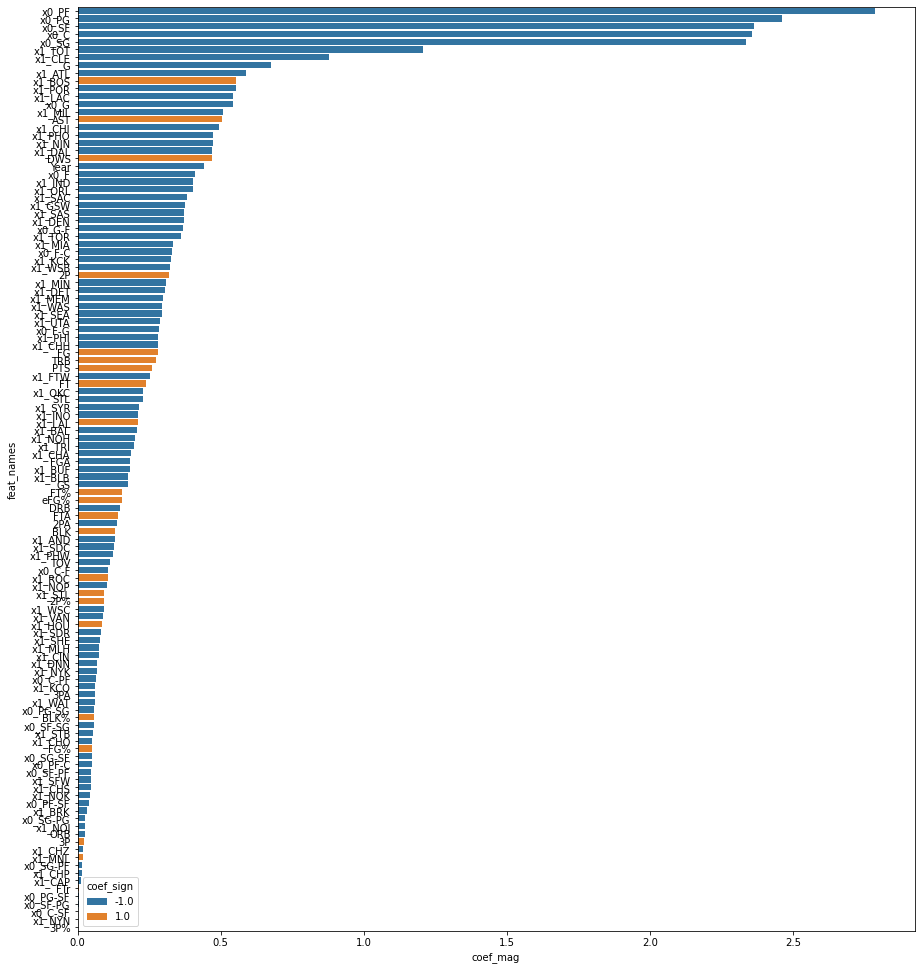

In [83]:

#get names in correct preproc order
cat_names = grid_search_lr.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()
num_names = grid_search_lr.best_estimator_.named_steps['preproc'].transformers_[1][2]
#create df with vip info
print(cat_names)
print(num_names)
print(grid_search_lr.best_estimator_.named_steps['preproc'].transformers_)
coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip_lr})

#get sign and magnitude information
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))


coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
plt.figure(figsize = (15,17))
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False)

Random Forest

In [84]:
grid_search_rf.classes_

array(['No', 'Yes'], dtype=object)

In [85]:
vip_rf = grid_search_rf.best_estimator_['rf']
vip_rf

print(grid_search_rf)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff0a99d1b50>),
                                                                        ('num_pipe',
                                             

In [88]:
# TODO: feel free to uncomment and edit the code below to obtain your feature importance graph. 
# Did the graph surprise you? What features did you think were more important?


#get names in correct preproc order
cat_names = grid_search_rf.best_estimator_.named_steps['preproc'].transformers_[0][1]
num_names = grid_search_rf.best_estimator_.named_steps['preproc'].transformers_[1][2]

#create df with vip info
#print(cat_names)
#print(num_names)

coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip_rf})

#get sign and magnitude information
#coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             #coef_sign = np.sign(coef_info['vip']))

#sort and plot
#coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
#plt.figure(figsize = (17,15))
#sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False)

ValueError: ignored

## Performance metrics on test data

In [89]:
print(classification_report(y_test, grid_search_lr.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

          No       0.95      0.99      0.97      5707
         Yes       0.72      0.39      0.51       463

    accuracy                           0.94      6170
   macro avg       0.84      0.69      0.74      6170
weighted avg       0.93      0.94      0.93      6170



Confusion Matrix

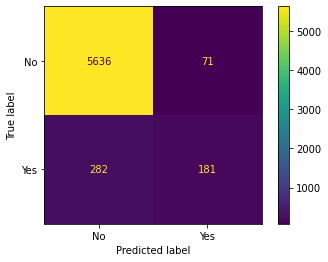

In [90]:
# TODO: plot the confusion matrix graph
confMatrix_lr = confusion_matrix(y_test, grid_search_lr.best_estimator_.predict(X_test))
confMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confMatrix_lr, 
                                           display_labels=grid_search_lr.classes_)
confMatrixDisplay.plot()
plt.show()

Accuracy

In [61]:
#     TP+TN/
#   TP+TN+FP+FN
numerator = 202+5650
denominator = 202+5650+261+57

accuracy = numerator/denominator
format_float = "{:.2f}".format(accuracy*100)
print('Accurancy', format_float,'%')

Accurancy 94.85 %
